In [67]:
import pandas as pd
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [68]:
cricket = pd.read_csv("Cricket.csv",encoding = "ISO-8859-1")

In [69]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [70]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [71]:
cricket1 = cricket[['Player','Ave','SR']]

In [72]:
cricket1.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [73]:
# standardise all parameters
cricket2 = cricket1.drop("Player", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cricket2 = standard_scaler.fit_transform(cricket2)

In [74]:
cricket2 = pd.DataFrame(cricket2)
cricket2.columns = ['Ave','SR']
cricket2.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [75]:
# Kmeans with K=5
model_cricket = KMeans(n_clusters = 4, max_iter=50, random_state=100)
model_cricket.fit(cricket2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [76]:
# analysis of clusters formed
cricket1.index = pd.RangeIndex(len(cricket1.index))
RFM_km = pd.concat([cricket1, pd.Series(model_cricket.labels_)], axis=1)
RFM_km.columns = ['Player','Ave','SR', 'ClusterID']

km_clusters_ave = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Ave.mean())
km_clusters_sr = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).SR.mean())

In [77]:
RFM_km[RFM_km['ClusterID'] == 3]

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),44.83,86.23,3
13,MS Dhoni (Asia/INDIA),51.32,88.69,3
15,AB de Villiers (Afr/SA),53.55,100.25,3
25,V Kohli (INDIA),53.94,90.99,3
34,HM Amla (SA),50.25,89.05,3
38,MG Bevan (AUS),53.58,74.16,3
42,IVA Richards (WI),47.00,90.20,3
63,MJ Guptill (NZ),43.30,87.73,3
64,MEK Hussey (AUS),48.15,87.16,3


In [78]:
RFM_km.head()

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,1
2,RT Ponting (AUS/ICC),42.03,80.39,1
3,ST Jayasuriya (Asia/SL),32.36,91.20,0
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2


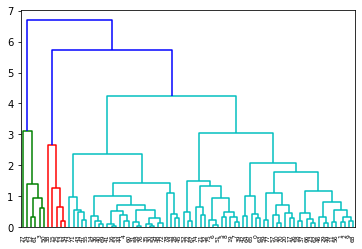

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

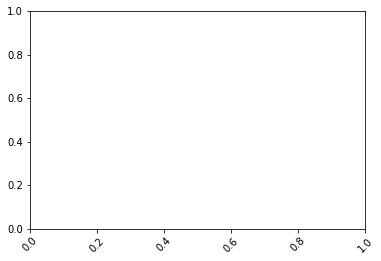

In [79]:
# heirarchical clustering
mergings = linkage(cricket2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()
plt.xticks(rotation=45)

In [80]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([cricket1, clusterCut], axis=1)
RFM_hc.columns = ['Player','Ave','SR', 'ClusterID']

In [85]:
km_clusters_ave = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Ave.mean())
km_clusters_sr = 	pd.DataFrame(RFM_hc.groupby(["ClusterID"]).SR.mean())
RFM_hc[RFM_hc['ClusterID'] == 0]

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),44.83,86.23,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0
9,BC Lara (ICC/WI),40.48,79.51,0
10,TM Dilshan (SL),39.27,86.23,0
11,Mohammad Yousuf (Asia/PAK),41.71,75.10,0
